<img src="https://www.bestdesigns.co/uploads/inspiration_images/4350/990__1511457498_404_walmart.png" alt="WALMART LOGO" />

# Walmart : predict weekly sales

## Company's Description 📇

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas. The company was founded by Sam Walton in 1962.

## Project 🚧

Walmart's marketing service has asked you to build a machine learning model able to estimate the weekly sales in their stores, with the best precision possible on the predictions made. Such a model would help them understand better how the sales are influenced by economic indicators, and might be used to plan future marketing campaigns.

## Goals 🎯

The project can be divided into three steps:

- Part 1 : make an EDA and all the necessary preprocessings to prepare data for machine learning
- Part 2 : train a **linear regression model** (baseline)
- Part 3 : avoid overfitting by training a **regularized regression model**

## Scope of this project 🖼️

For this project, you'll work with a dataset that contains information about weekly sales achieved by different Walmart stores, and other variables such as the unemployment rate or the fuel price, that might be useful for predicting the amount of sales. The dataset has been taken from a Kaggle competition, but we made some changes compared to the original data. Please make sure that you're using **our** custom dataset (available on JULIE). 🤓

## Deliverable 📬

To complete this project, your team should: 

- Create some visualizations
- Train at least one **linear regression model** on the dataset, that predicts the amount of weekly sales as a function of the other variables
- Assess the performances of the model by using a metric that is relevant for regression problems
- Interpret the coefficients of the model to identify what features are important for the prediction
- Train at least one model with **regularization (Lasso or Ridge)** to reduce overfitting


## Helpers 🦮

To help you achieve this project, here are a few tips that should help you: 

### Part 1 : EDA and data preprocessing

Start your project by exploring your dataset : create figures, compute some statistics etc...

Then, you'll have to make some preprocessing on the dataset. You can follow the guidelines from the *preprocessing template*. There will also be some specific transformations to be planned on this dataset, for example on the *Date* column that can't be included as it is in the model. Below are some hints that might help you 🤓

 #### Preprocessing to be planned with pandas

 **Drop lines where target values are missing :**
 - Here, the target variable (Y) corresponds to the column *Weekly_Sales*. One can see above that there are some missing values in this column.
 - We never use imputation techniques on the target : it might create some bias in the predictions !
 - Then, we will just drop the lines in the dataset for which the value in *Weekly_Sales* is missing.
 
**Create usable features from the *Date* column :**
The *Date* column cannot be included as it is in the model. Either you can drop this column, or you will create new columns that contain the following numeric features : 
- *year*
- *month*
- *day*
- *day of week*

**Drop lines containing invalid values or outliers :**
In this project, will be considered as outliers all the numeric features that don't fall within the range : $[\bar{X} - 3\sigma, \bar{X} + 3\sigma]$. This concerns the columns : *Temperature*, *Fuel_price*, *CPI* and *Unemployment*
 


**Target variable/target (Y) that we will try to predict, to separate from the others** : *Weekly_Sales*

 **------------**

 #### Preprocessings to be planned with scikit-learn

 **Explanatory variables (X)**
We need to identify which columns contain categorical variables and which columns contain numerical variables, as they will be treated differently.

 - Categorical variables : Store, Holiday_Flag
 - Numerical variables : Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day, DayOfWeek

### Part 2 : Baseline model (linear regression)
Once you've trained a first model, don't forget to assess its performances on the train and test sets. Are you satisfied with the results ?
Besides, it would be interesting to analyze the values of the model's coefficients to know what features are important for the prediction. To do so, the `.coef_` attribute of scikit-learn's LinearRegression class might be useful. Please refer to the following link for more information 😉 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### Part 3 : Fight overfitting
In this last part, you'll have to train a **regularized linear regression model**. You'll find below some useful classes in scikit-learn's documentation :
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

**Bonus question**

In regularized regression models, there's a hyperparameter called *the regularization strength* that can be fine-tuned to get the best generalized predictions on a given dataset. This fine-tuning can be done thanks to scikit-learn's GridSearchCV class : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Also, you'll find here some examples of how to use GridSearchCV together with Ridge or Lasso models : https://alfurka.github.io/2018-11-18-grid-search/

Part 1 : EDA and data preprocessing

In [62]:
! pip install plotly
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns
import plotly.express as px
import pandas as pd
import math as math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [73]:
datawal=pd.read_csv("Walmart_Store_sales.csv")
datawal.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


In [74]:
datawal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


In [75]:
# Basic stats

print("Basics statistics: ")
data_desc = datawal.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*datawal.isnull().sum()/datawal.shape[0])
print()

Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,07-01-2011,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000



Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

In [76]:
#CPI : "Consumer price index" : This index measures the change in prices for the essential goods and services 
#that the least wealthy in our society must consume, such as rent, food and energy.

In [77]:
# Drop rows without "y" column (Weekly_sales)
datawal = datawal[datawal['Weekly_Sales'].notna()]
datawal


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896
...,...,...,...,...,...,...,...,...
145,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899
146,7.0,NaN,716388.81,NaN,20.74,2.778,NaN,NaN
147,17.0,11-06-2010,845252.21,0.0,57.14,2.841,126.111903,NaN
148,8.0,12-08-2011,856796.10,0.0,86.05,3.638,219.007525,NaN


In [78]:
# Drop rows with Nan in Date column 
datawal = datawal[datawal['Date'].notna()]
datawal



,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896
6,15.0,03-06-2011,695396.19,0.0,69.80,4.069,134.855161,7.658
...,...,...,...,...,...,...,...,...
144,3.0,19-10-2012,424513.08,0.0,73.44,3.594,226.968844,6.034
145,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899
147,17.0,11-06-2010,845252.21,0.0,57.14,2.841,126.111903,NaN
148,8.0,12-08-2011,856796.10,0.0,86.05,3.638,219.007525,NaN


In [79]:
#Convert date in datetime object
datawal['Date'] = pd.to_datetime(datawal['Date'])
datawal.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         118 non-null    float64       
 1   Date          118 non-null    datetime64[ns]
 2   Weekly_Sales  118 non-null    float64       
 3   Holiday_Flag  109 non-null    float64       
 4   Temperature   107 non-null    float64       
 5   Fuel_Price    107 non-null    float64       
 6   CPI           109 non-null    float64       
 7   Unemployment  107 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 8.3 KB


<ipython-input-79-cd4c10bb5387>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datawal['Date'] = pd.to_datetime(datawal['Date'])


In [80]:
#create 4 columns for splitting date
datawal['year'] = datawal['Date'].dt.year
datawal['month'] = datawal['Date'].dt.month
datawal['day'] = datawal['Date'].dt.day
datawal['weekday'] = datawal['Date'].dt.weekday
datawal

<ipython-input-80-b37875fc634e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datawal['year'] = datawal['Date'].dt.year
<ipython-input-80-b37875fc634e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datawal['month'] = datawal['Date'].dt.month
<ipython-input-80-b37875fc634e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,weekday
0,6.0,2011-02-18,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011,2,18,4
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011,3,25,4
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010,5,28,4
5,4.0,2010-05-28,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010,5,28,4
6,15.0,2011-03-06,695396.19,0.0,69.80,4.069,134.855161,7.658,2011,3,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
144,3.0,2012-10-19,424513.08,0.0,73.44,3.594,226.968844,6.034,2012,10,19,4
145,14.0,2010-06-18,2248645.59,0.0,72.62,2.780,182.442420,8.899,2010,6,18,4
147,17.0,2010-11-06,845252.21,0.0,57.14,2.841,126.111903,NaN,2010,11,6,5
148,8.0,2011-12-08,856796.10,0.0,86.05,3.638,219.007525,NaN,2011,12,8,3


In [81]:
# Drop columns Store and HolydayFlag (useless) 

columns = ['Store','Holiday_Flag','Date','year','month','day']
datawal = datawal.drop(columns, axis=1)
datawal


,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,weekday
0,1572117.54,59.61,3.045,214.777523,6.858,4
1,1807545.43,42.38,3.435,128.616064,7.470,4
4,1644470.66,78.89,2.759,212.412888,7.092,4
5,1857533.70,NaN,2.756,126.160226,7.896,4
6,695396.19,69.80,4.069,134.855161,7.658,6
...,...,...,...,...,...,...
144,424513.08,73.44,3.594,226.968844,6.034,4
145,2248645.59,72.62,2.780,182.442420,8.899,4
147,845252.21,57.14,2.841,126.111903,NaN,5
148,856796.10,86.05,3.638,219.007525,NaN,3


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature'>

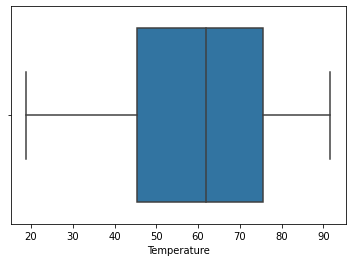

In [82]:
# detect outliers for Temperature, Fuel_price, CPI and Unemployment columns
sns.boxplot(datawal['Temperature'])


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel_Price'>

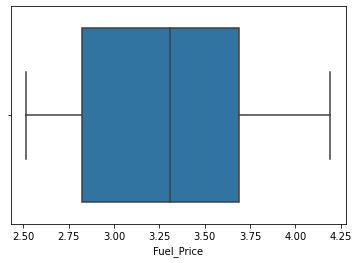

In [83]:
sns.boxplot(datawal['Fuel_Price'])


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CPI'>

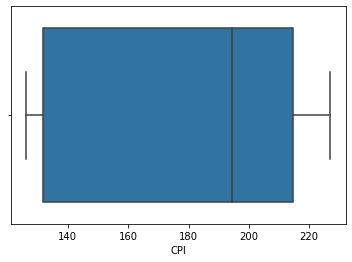

In [84]:
sns.boxplot(datawal['CPI'])


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Unemployment'>

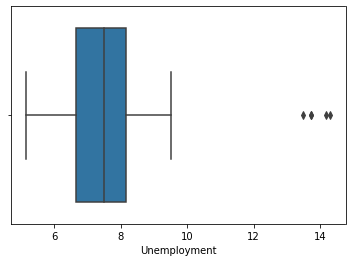

In [85]:
sns.boxplot(datawal['Unemployment'])

In [86]:
datawal['Unemployment'].mean()

7.68129906542056

In [87]:
#We can see there is some outliers for this feature (around 14%)

In [88]:
datawal["Unemployment"].std()*3

5.034464011745252

In [89]:
upper_bound = datawal["Unemployment"].mean()+datawal["Unemployment"].std()*3
upper_bound

12.71576307716581

In [90]:
lower_bound = datawal["Unemployment"].mean()-datawal["Unemployment"].std()*3
lower_bound

2.646835053675308

In [91]:
mask = (datawal["Unemployment"] < upper_bound) & (datawal["Unemployment"] > lower_bound)
mask

0       True
1       True
4       True
5       True
6       True
       ...  
144     True
145     True
147    False
148    False
149     True
Name: Unemployment, Length: 118, dtype: bool

In [92]:
#cleaning of outliers
clean_datawal = datawal.loc[mask, :]
clean_datawal.head()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,weekday
0,1572117.54,59.61,3.045,214.777523,6.858,4
1,1807545.43,42.38,3.435,128.616064,7.470,4
4,1644470.66,78.89,2.759,212.412888,7.092,4
5,1857533.70,NaN,2.756,126.160226,7.896,4
6,695396.19,69.80,4.069,134.855161,7.658,6


In [104]:
clean_datawal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  102 non-null    float64
 1   Temperature   94 non-null     float64
 2   Fuel_Price    92 non-null     float64
 3   CPI           94 non-null     float64
 4   Unemployment  102 non-null    float64
 5   weekday       102 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 5.6 KB


In [93]:
#check missing values and strategy to set up
print("Percentage of missing values: ")
display(100*clean_datawal.isnull().sum()/clean_datawal.shape[0])
print()



Percentage of missing values: 


Weekly_Sales    0.000000
Temperature     7.843137
Fuel_Price      9.803922
CPI             7.843137
Unemployment    0.000000
weekday         0.000000
dtype: float64

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weekday', ylabel='count'>

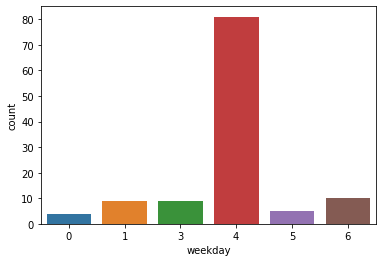

In [94]:
sns.countplot(datawal['weekday'])

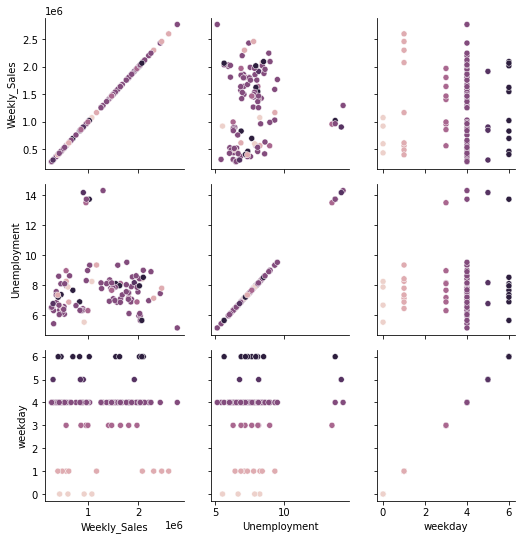

In [95]:
g = sns.PairGrid(datawal, vars=["Weekly_Sales","Unemployment","weekday"], hue="weekday")
g.map(sns.scatterplot)

<AxesSubplot:>

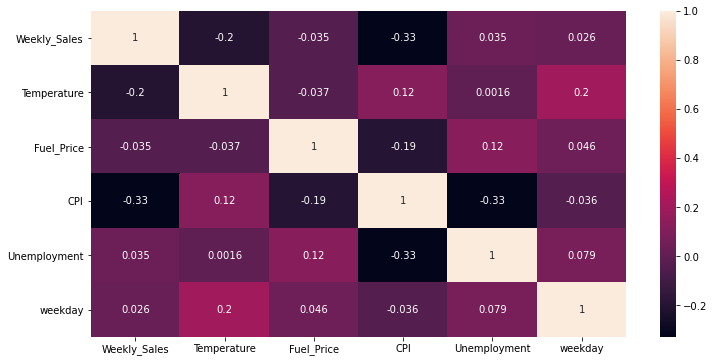

In [96]:
corr = datawal.corr()
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(corr, annot=True, ax=ax)

In [97]:
#affectation des variables X et Y

In [206]:
X = datawal.iloc[:,1:]
Y = datawal.iloc[:,0]


In [207]:
Y

0      1572117.54
1      1807545.43
4      1644470.66
5      1857533.70
6       695396.19
          ...    
144     424513.08
145    2248645.59
147     845252.21
148     856796.10
149    1255087.26
Name: Weekly_Sales, Length: 118, dtype: float64

In [208]:
X

,Temperature,Fuel_Price,CPI,Unemployment,weekday
0,59.61,3.045,214.777523,6.858,4
1,42.38,3.435,128.616064,7.470,4
4,78.89,2.759,212.412888,7.092,4
5,NaN,2.756,126.160226,7.896,4
6,69.80,4.069,134.855161,7.658,6
...,...,...,...,...,...
144,73.44,3.594,226.968844,6.034,4
145,72.62,2.780,182.442420,8.899,4
147,57.14,2.841,126.111903,NaN,5
148,86.05,3.638,219.007525,NaN,3


In [222]:
#preprocessing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train.head()

,Temperature,Fuel_Price,CPI,Unemployment,weekday
8,30.54,3.109,NaN,NaN,1
66,73.67,2.792,132.614193,9.342,1
123,NaN,3.786,215.503788,7.682,4
114,69.90,2.735,215.061402,7.564,4
143,78.53,2.705,214.495838,7.343,1


In [238]:
#### NUMERIC 
# Create pipeline for numeric features
numeric_features = [0,1,2,3,4] # Positions of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # missing values in Age will be replaced by columns' mean
    ('scaler', StandardScaler())
])


In [239]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric_transformer', numeric_transformer, numeric_features),
        
    ])

In [240]:
# Preprocessings on train set
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[:5])
print()

...Done.
[[-1.86041910e+00 -3.46668216e-01  2.70786104e-17  1.40923658e-16
  -1.90821457e+00]
 [ 6.65491656e-01 -1.04020885e+00 -1.06644023e+00  9.76759353e-01
  -1.90821457e+00]
 [ 7.92522417e-16  1.13448953e+00  1.08572741e+00 -1.34896572e-02
   1.96811369e-01]
 [ 4.44701404e-01 -1.16491489e+00  1.07424120e+00 -8.38808519e-02
   1.96811369e-01]
 [ 9.50117816e-01 -1.23054965e+00  1.05955674e+00 -2.15715208e-01
  -1.90821457e+00]]



In [241]:
# Preprocessings on test set
X_test = preprocessor.transform(X_test)
print('...Done.')
print(X_test[:5])
print()

...Done.
[[-1.95939404e+00 -1.93520443e-01  8.03740892e-01 -1.31603696e-01
   1.96811369e-01]
 [ 3.99020663e-01 -7.90796758e-01 -1.07475549e+00  1.40923658e-16
   1.96811369e-01]
 [-1.63904320e+00 -1.62890888e-01  2.31360658e-01  1.40923658e-16
   1.96811369e-01]
 [-6.02441752e-01 -8.52055867e-01 -1.06256737e+00  9.70197462e-01
   1.96811369e-01]
 [-1.73333294e+00 -4.11062387e-16 -1.12706596e+00 -9.54822753e-01
   1.96811369e-01]]



In [242]:
# Train model

regressor = LinearRegression()
regressor.fit(X_train, Y_train) # Training is always done on train set !!
print("...Done.")

...Done.


In [243]:
regressor.score(X_train, Y_train)

0.1469519510878301

In [244]:
regressor.predict(X_test)

array([1324949.24378565, 1447467.75067786, 1402535.84535133,
       1503514.77133268, 1776471.84277203, 1311894.44127597,
        884161.95034724,  961037.83395816, 1289188.43422214,
       1157427.84597528, 1494996.95741555, 1083586.75285873,
        946409.56340548, 1164283.62193299, 1463030.13471361,
        956531.47584912, 1408910.05910566, 1066733.54194309,
       1280755.65451787,  998231.94101993,  914508.19572542,
       1410307.76957613,  926639.03900433, 1024038.23286632,
       1166734.48415566, 1149686.24452789,  986118.21488539,
       1239772.75531708, 1353882.80940052,  921994.28882154,
       1299966.11068148, 1161332.22730223,  994386.41802912,
       1652357.11431046, 1528238.66355214,  994220.26015358])

In [245]:
# Predictions on training set

Y_train_pred = regressor.predict(X_train)
print("...Done.")
print(Y_train_pred[0:5])
print()

...Done.
[1424241.63199252 1290981.19154583  996442.69143622  977793.36631311
  869470.41577731]



In [247]:
# Predictions on test set

Y_test_pred = regressor.predict(X_test)
print("...Done.")
print(Y_test_pred[0:5])
print()

...Done.
[1324949.24378565 1447467.75067786 1402535.84535133 1503514.77133268
 1776471.84277203]



In [254]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score

In [255]:
# Perform grid search
print("Grid search...")
regressor = Ridge()
# Grid of values to be tested
params = {
    'alpha': [0.0, 0.1, 0.5, 1.0] # 0 corresponds to no regularization
}
gridsearch = GridSearchCV(regressor, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'alpha': 1.0}
Best R2 score :  0.07980125833039468
